In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
import seaborn as sns

In [17]:
sns.set_style('darkgrid')

In [4]:
df = pd.read_csv('HRDataset.csv')
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,...,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30
0,"Brown, Mia",1.103024e+09,1.0,1.0,0.0,1.0,1.0,3.0,1.0,28.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Diversity Job Fair,Fully Meets,2.04,2.0,6.0,1/15/2019,0.0
1,"LaRotonda, William",1.106027e+09,0.0,2.0,1.0,1.0,1.0,3.0,0.0,23.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,4.0,4.0,1/17/2019,0.0
2,"Steans, Tyrone",1.302053e+09,0.0,0.0,1.0,1.0,1.0,3.0,0.0,29.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Internet Search,Fully Meets,3.90,5.0,5.0,1/18/2019,0.0
3,"Howard, Estelle",1.211051e+09,1.0,1.0,0.0,1.0,1.0,3.0,0.0,21.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Pay Per Click - Google,Fully Meets,3.24,3.0,4.0,NaN,NaN
4,"Singh, Nan",1.307060e+09,0.0,0.0,0.0,1.0,1.0,3.0,0.0,16.56,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,3.0,5.0,1/15/2019,0.0


<AxesSubplot:>

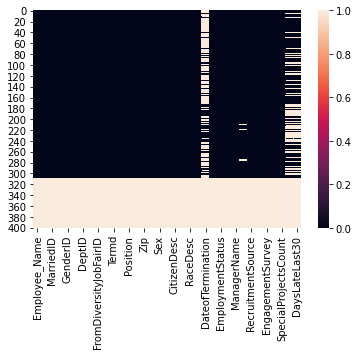

In [6]:
sns.heatmap(df.isnull())

In [7]:
df.drop(['LastPerformanceReview_Date','DaysLateLast30'],axis=1,inplace=True)

In [8]:
df.dropna(thresh=2,inplace=True)

In [9]:
df['DOB'] = pd.to_datetime(df['DOB'],format='%m/%d/%y')
df['DateofHire'] = pd.to_datetime(df['DateofHire'],format='%m/%d/%Y')
df['DateofTermination'] = pd.to_datetime(df['DateofTermination'],format='%m/%d/%y')

In [10]:
df[['DateofTermination','DOB','DateofHire']].head()

,DateofTermination,DOB,DateofHire
0,NaT,1987-11-24,2008-10-27
1,NaT,1984-04-26,2014-01-06
2,NaT,1986-09-01,2014-09-29
3,2015-04-15,1985-09-16,2015-02-16
4,NaT,1988-05-19,2015-05-01


In [20]:
import datetime as dt

def count_seniority(row):

    if pd.isnull(row['DateofTermination']):
        end_date = dt.datetime(2019,9,27)
    else:
        end_date = row['DateofTermination']

    return (end_date - row['DateofHire'])/np.timedelta64(1,'Y')

In [21]:
df['Seniority'] = df.apply(lambda row: count_seniority(row),axis=1)

In [22]:
df[['DateofHire','DateofTermination','Seniority']].head()

,DateofHire,DateofTermination,Seniority
0,2008-10-27,NaT,10.916035
1,2014-01-06,NaT,5.722226
2,2014-09-29,NaT,4.993942
3,2015-02-16,2015-04-15,0.158799
4,2015-05-01,NaT,4.408030


### 1. Po przeanalizowaniu danych oraz wykresów nie zauważyłem znacznej zależności pomiędzy Manager oraz wynikiem wydajności pracownika.
#### Jedynie co można zauważyć, że większość managerów w większości przypadków daje pracownikom ocenę 'Fully Meets"

In [11]:
def perf_score(x):
    y = 0
    if x['PerformanceScore'] == 'Exceeds':
        y = 4
    elif x['PerformanceScore'] == 'Fully Meets':
        y = 3
    elif x['PerformanceScore'] == 'Needs Improvement':
        y = 2
    elif x['PerformanceScore'] == 'PIP':
        y = 1
    return y

In [12]:
df['PerformanceScore_score'] = df.apply(lambda x: perf_score(x), axis=1)

In [39]:
pivot = df.pivot_table(values=['PerformanceScore_score', 'EmpID'], 
                       index='ManagerID', 
                       aggfunc={'PerformanceScore_score': np.mean,'EmpID': np.count_nonzero})
pivot.reset_index(inplace=True)

In [40]:
pivot.rename(columns={'EmpID': 'Emp_Count'}, inplace=True)

In [41]:
pivot

,ManagerID,Emp_Count,PerformanceScore_score
0,1.0,6.0,3.000000
1,2.0,19.0,3.105263
2,3.0,1.0,3.000000
3,4.0,17.0,3.117647
4,5.0,7.0,3.142857
5,6.0,4.0,3.250000
6,7.0,14.0,2.857143
7,9.0,2.0,3.000000
8,10.0,9.0,3.111111
9,11.0,21.0,2.904762


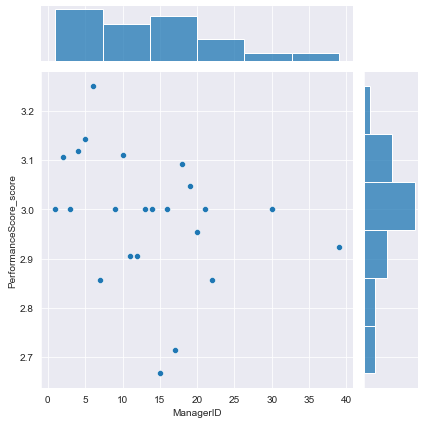

In [18]:
sns.jointplot(x='ManagerID',y='PerformanceScore_score',data=pivot)

### 2. Jak widać z wykresu poniżej najlepszy źródłem pozyskania pracownika jeżeli zależy nam na długim stażu pracy jest 'Careerbuilder'

<AxesSubplot:xlabel='RecruitmentSource', ylabel='Seniority'>

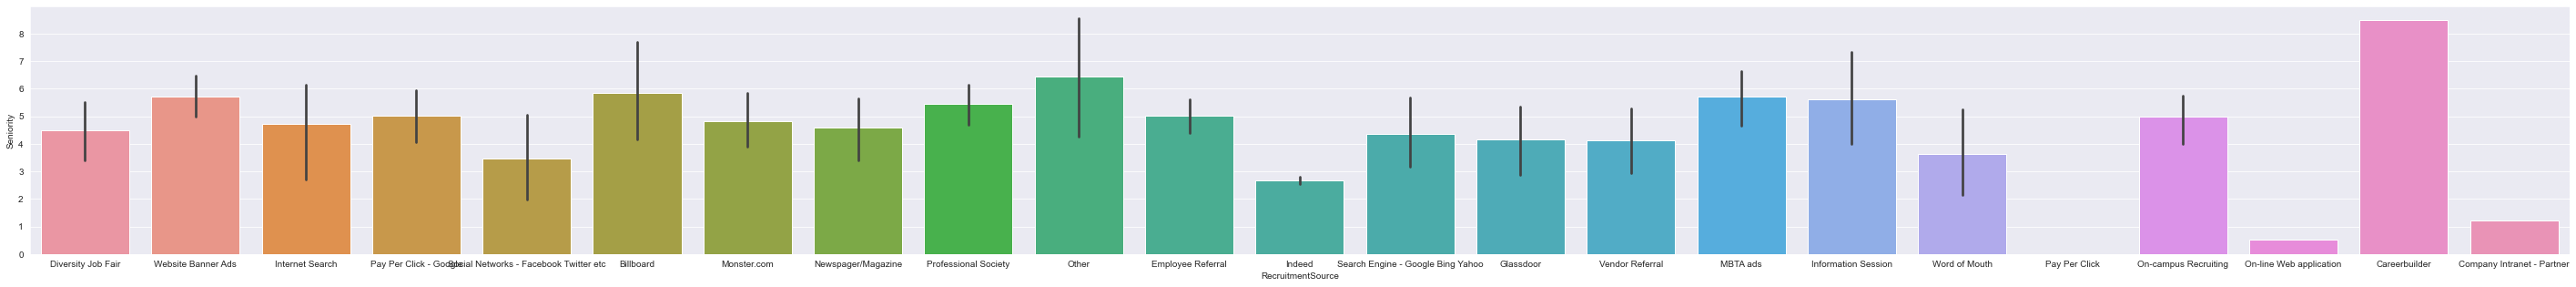

In [37]:
plt.figure(figsize=(50,5))
sns.barplot(x='RecruitmentSource',y='Seniority',data=df)

### 3. Obeserwując wykresy poniżej można zauważyc niewielką zależność pomiędzy stanem cywilnym a satysfkacją z pracy.
#### Jedyne osoby z wynikiem jeden to single lub osoby w separacji. W pozostałych grupach nikt nie nie dał oceny poniżej dwójki. Natomiast jest to nieznaczna zależność gdyż są to pojedyńcze przypadki, które można uznać za 'outliera'.
#### Poza tymi przypadkami nie można zauważyć zależności pomiędzy statusem cywilnym a satysfkacją z pracy.

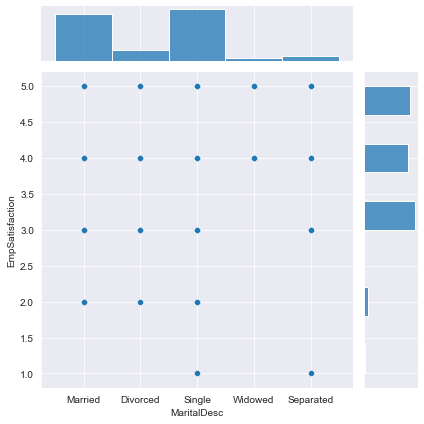

In [24]:
sns.jointplot(x='MaritalDesc',y='EmpSatisfaction',data=df)

<AxesSubplot:xlabel='MaritalDesc', ylabel='EmpSatisfaction'>

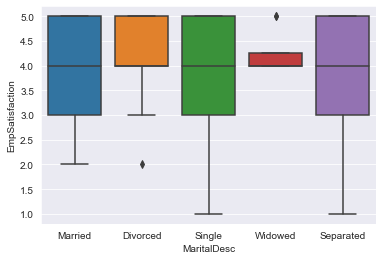

In [25]:
sns.boxplot(x='MaritalDesc',y='EmpSatisfaction',data=df)

### 4. Poniżej wykres przedstawiający strukturę wieku zatrudnionych pracowników.
#### Otrzymane dane miały niestety dość dużo błędów - wielu pracowników miało przypisaną datę urodzenia w przyszłości.
#### Po filtracji danych struktura wieku przedstawia się jak niżej - największa grupa pracownikow to osoby w wieku 30 - 35 lat.

In [26]:
def age(row):
    today = dt.datetime(2019,9,27)
    return (today - row['DOB'])/np.timedelta64(1,'Y')

In [27]:
df['Age'] = df.apply(lambda row: age(row),axis=1)

In [28]:
df['Age'] = df[df['Age'] > 0]['Age']

In [29]:
df['Age'].head()

0    31.841858
1    35.420303
2    33.071179
3    34.029446
4    31.357249
Name: Age, dtype: float64

C:\Users\debsk\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

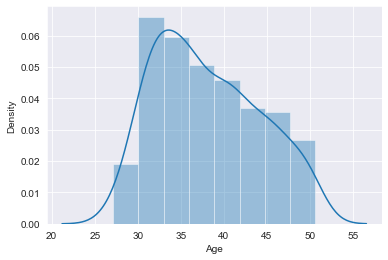

In [30]:
sns.distplot(df['Age'])

### 5. Po przeanalizowaniu wykresów poniżej można stwierdzić niewielką zależności pomiędzy wiekiem a ilością projektów.
#### Osoby, które podjeły się 7 projetków są statystycznie starsze niż osoby podejumjące się udziału w mniejszej ilości projektów.
#### Większość osób nie brała udział w żadnym projekcie.

In [51]:
df['Age'].describe()

count    268.000000
mean      38.074540
std        6.036726
min       27.110755
25%       33.047907
50%       37.020610
75%       42.573769
max       50.629376
Name: Age, dtype: float64

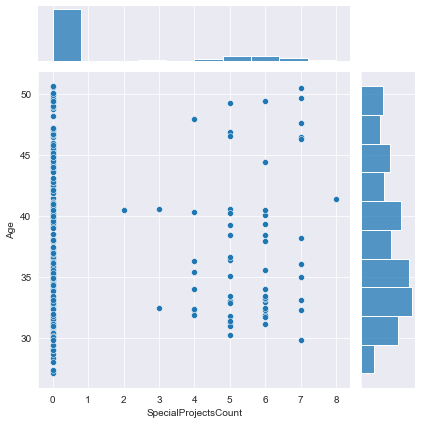

In [31]:
sns.jointplot(x='SpecialProjectsCount',y='Age',data=df)

<AxesSubplot:xlabel='SpecialProjectsCount', ylabel='count'>

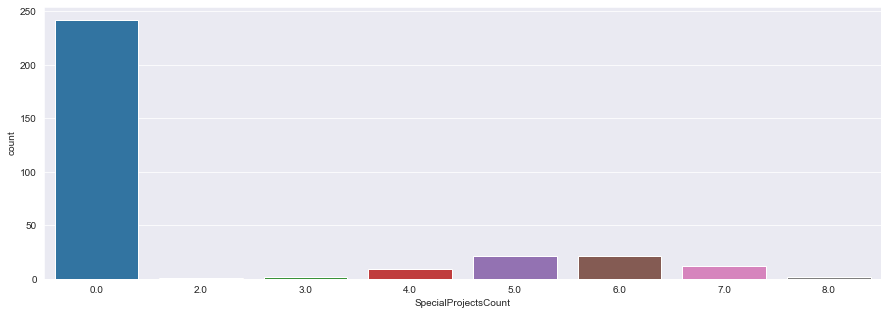

In [44]:
plt.figure(figsize=(15,5))
sns.countplot(x='SpecialProjectsCount', data=df)

<AxesSubplot:xlabel='SpecialProjectsCount', ylabel='Age'>

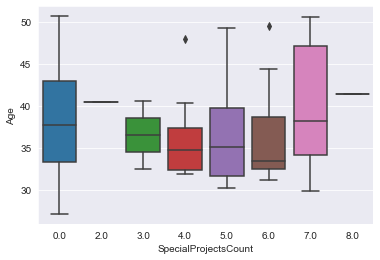

In [50]:
sns.boxplot(x='SpecialProjectsCount',y='Age',data=df)